In [36]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Wartości dla prostej 1: a = -0.004128465202983353, b = 542.0018161611501
Wartości dla prostej 2: a = -0.002984039800524389, b = 539.4302175393883
Niepewnosc a: 0.0008210706246410963
Niepewnosc b: 0.039899348369469886
Niepewnosc delta m = 0.03041037054157861


/tmp/ipykernel_7022/2356348664.py:26: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(pcov1), np.sqrt(pcov2)


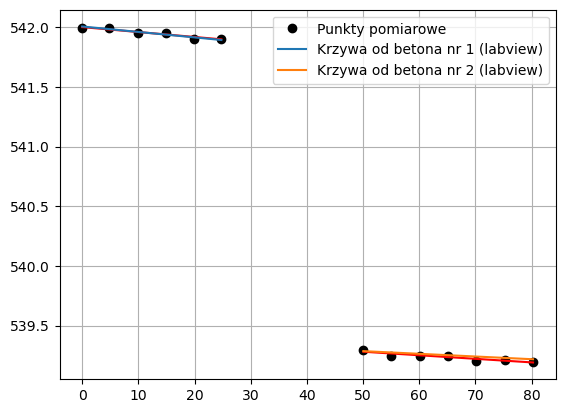

In [ ]:
data = pd.read_csv('cieplo_wlasciwe.xslx.csv')
data_1 = data[0:6]
data_2 = data[6:]

czas_1, masa_1 = data_1['czas'], data_1['masa']
czas_2, masa_2 = data_2['czas'], data_2['masa']

def linearFun(t, a, b):
    return a*t + b

popt1, pcov1 = curve_fit(linearFun, xdata = czas_1, ydata = masa_1, p0=[-0.001, 500])
popt2, pcov2 = curve_fit(linearFun, xdata = czas_2, ydata = masa_2, p0=[-0.001, 500])

plt.plot(data['czas'], data['masa'], color = 'black', label = "Punkty pomiarowe", marker = 'o', linestyle = '')
plt.plot(czas_1, popt1[0]*czas_1 + popt1[1], color = 'red')
plt.plot(czas_2, popt2[0]*czas_2 + popt2[1], color = 'red')

plt.plot(czas_1, czas_1*(-0.004571)+542.007141, label = "Krzywa od betona nr 1 (labview)")
plt.plot(czas_2, czas_2*(-0.0022571)+539.398806, label = "Krzywa od betona nr 2 (labview)")

plt.legend()
plt.grid()

print(f"Wartości dla prostej 1: a = {popt1[0]}, b = {popt1[1]}")
print(f"Wartości dla prostej 2: a = {popt2[0]}, b = {popt2[1]}")
np.sqrt(pcov1), np.sqrt(pcov2)


b_uncertainty = np.sqrt(pcov1[1][1] + pcov2[1][1])
a_uncertainty = np.sqrt(pcov1[0][0] + pcov2[0][0])

print(f"Niepewnosc a: {a_uncertainty}\nNiepewnosc b: {b_uncertainty}")
print(f"Niepewnosc delta m = {abs(np.sqrt(pcov1[1][1]) - np.sqrt(pcov2[1][1])) + 0.05}")